In [1]:
import pandas as pd

# LAB 2

In [2]:
df=pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df=df.drop(['Unnamed: 0'], axis=1)

#### 1. Show the dataframe shape.

In [4]:
df.shape

(10910, 25)

#### 2. Standardize header names.

In [5]:
cols_df=[col_name.lower().replace(' ','_') for col_name in df.columns]
df.columns=cols_df

#### 3. Which columns are numerical?

In [6]:
numericals=df.select_dtypes('number')
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


#### 4. Which columns are categorical?

In [7]:
categoricals=df.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### 5. Check and deal with NaN values.

In [8]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [9]:
df.dropna()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [10]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

#### 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [11]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')

In [12]:
df['MONTH'] = df['effective_to_date'].dt.month

In [13]:
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,MONTH
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# START of LAB 3

7. Show DataFrame info.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10279 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10279 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

8. Describe DataFrame.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
MONTH,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


9. Show a plot of the total number of responses.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') # no more warnings 

<AxesSubplot:xlabel='response', ylabel='count'>

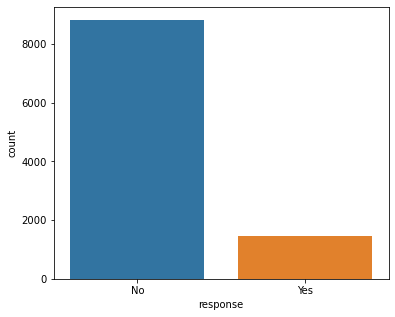

In [17]:
plt.figure(figsize=(6,5))
sns.countplot('response', data=df)

10. Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

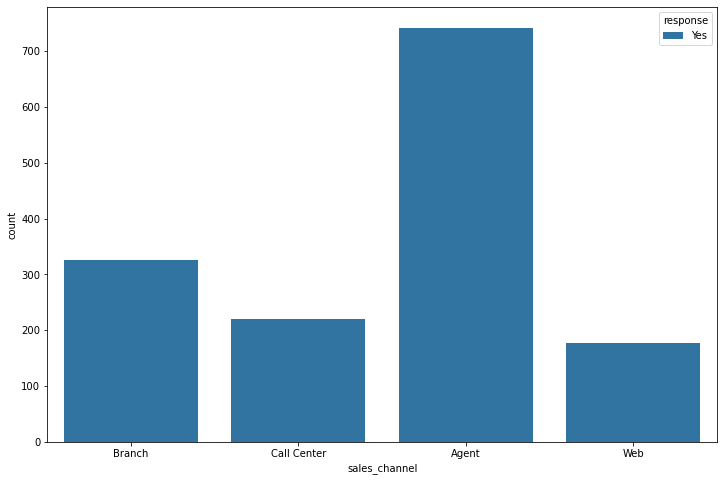

In [18]:
df_1=df[(df['response']=='Yes')]
plt.figure(figsize=(12,8))
sns.countplot('sales_channel', hue='response', data=df_1)

11. Show a plot of the response rate by the total claim amount.

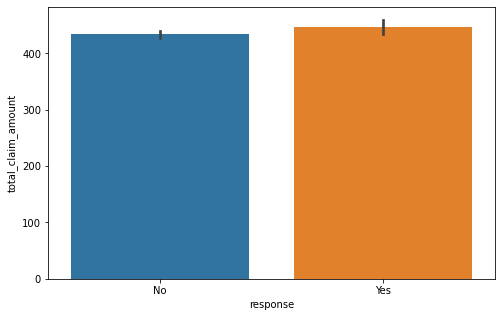

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="response", y="total_claim_amount", data=df)
plt.show()

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

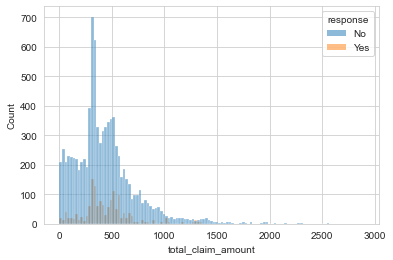

In [20]:
sns.set_style('whitegrid')
sns.histplot(data=df, x="total_claim_amount",  hue="response")

12. Show a plot of the response rate by income.

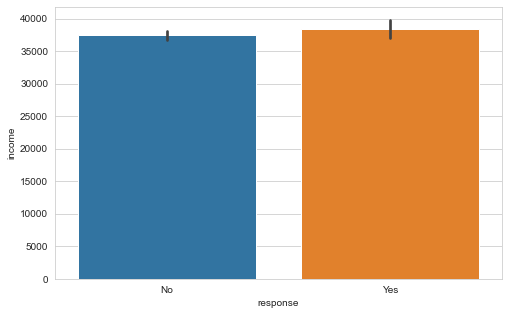

In [21]:
plt.figure(figsize=(8,5))

sns.barplot(x="response", y="income", data=df)
plt.show()

<AxesSubplot:xlabel='income', ylabel='Count'>

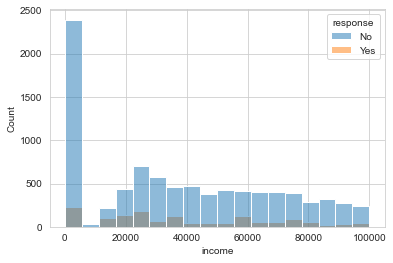

In [22]:
sns.set_style('whitegrid')
sns.histplot(data=df, x="income",  hue="response")

# Start of LAB4

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [23]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [24]:
df_numerical = df.select_dtypes(include='number')
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,MONTH
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000,1
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [25]:
df_categorical = df.select_dtypes(include='object')
df_categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


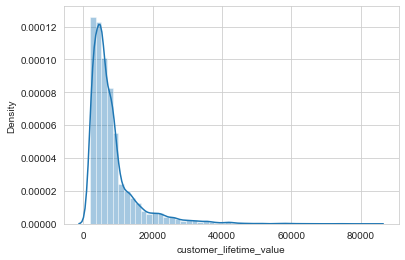

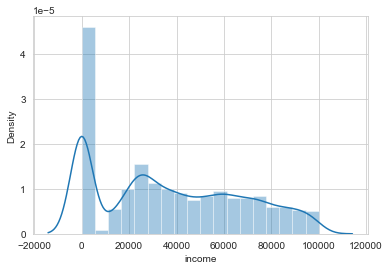

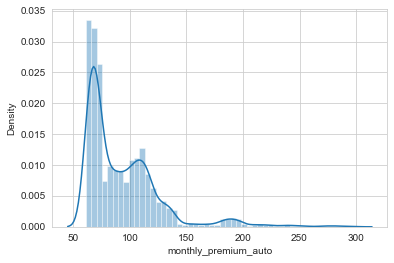

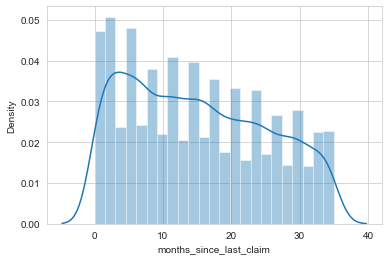

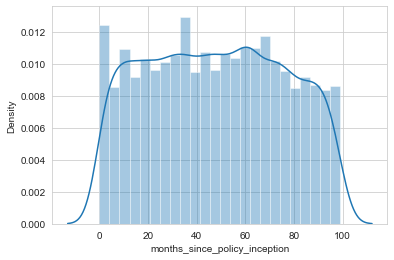

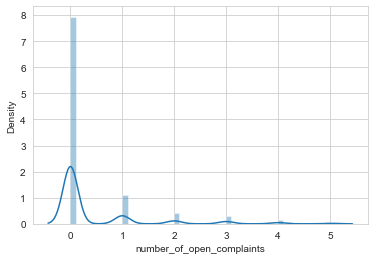

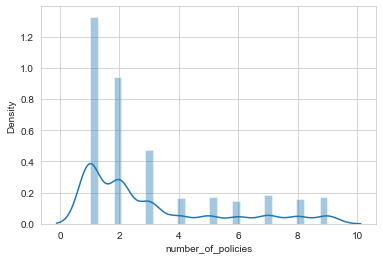

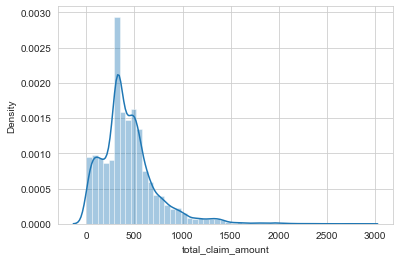

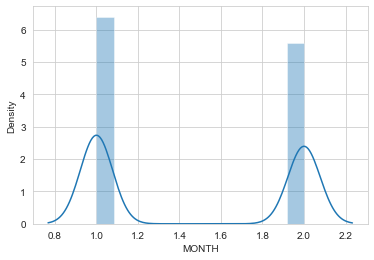

In [26]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in df_numerical:
    sns.distplot(df_numerical[column])
    plt.show()  

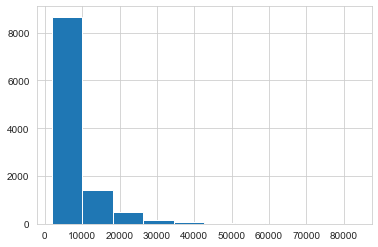

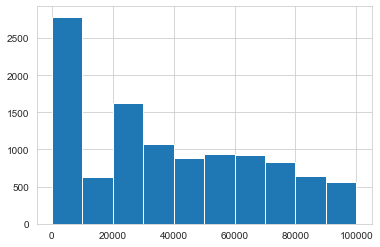

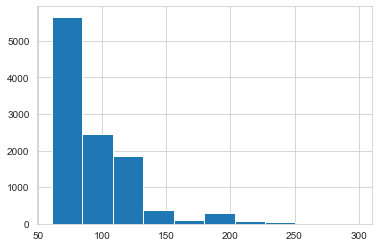

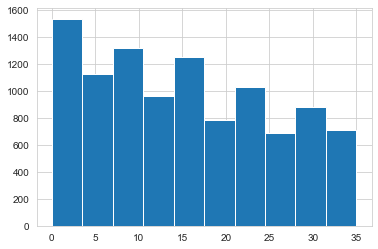

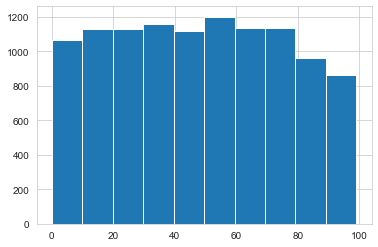

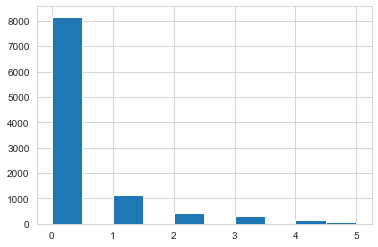

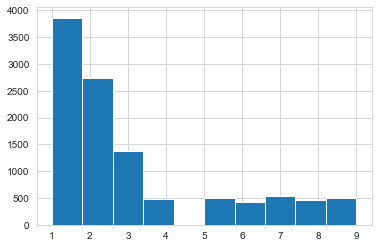

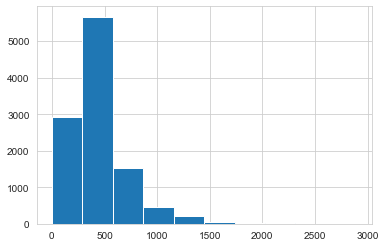

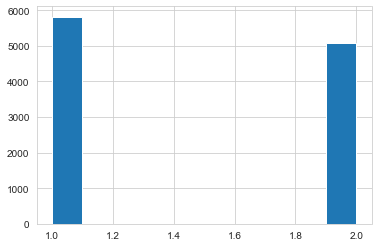

In [27]:
#Use Matplotlib to construct histograms
for column in df_numerical:
    df_numerical[column].hist()
    plt.show() 

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [28]:
df_features=df_numerical.drop(['total_claim_amount'], axis=1)
df_features

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,MONTH
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
4,9025.067525,23675,117,NaN,31,NaN,7,1
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2
10908,11971.977650,64195,158,0.0,27,4.0,6,2


In [29]:
correlations_matrix = df_features.corr(method='spearman')  # method='spearman'
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,MONTH
customer_lifetime_value,1.000000,0.058577,0.454289,0.006398,0.001445,-0.026373,0.483307,-0.006368
income,0.058577,1.000000,-0.009749,-0.023102,-0.006549,0.007458,-0.013528,-0.001116
monthly_premium_auto,0.454289,-0.009749,1.000000,-0.003896,0.012536,-0.009123,-0.013975,0.013121
months_since_last_claim,0.006398,-0.023102,-0.003896,1.000000,-0.044703,0.003674,0.010520,-0.019716
months_since_policy_inception,0.001445,-0.006549,0.012536,-0.044703,1.000000,-0.007401,-0.005929,0.015100
number_of_open_complaints,-0.026373,0.007458,-0.009123,0.003674,-0.007401,1.000000,0.003124,-0.005660
number_of_policies,0.483307,-0.013528,-0.013975,0.010520,-0.005929,0.003124,1.000000,-0.000174
MONTH,-0.006368,-0.001116,0.013121,-0.019716,0.015100,-0.005660,-0.000174,1.000000


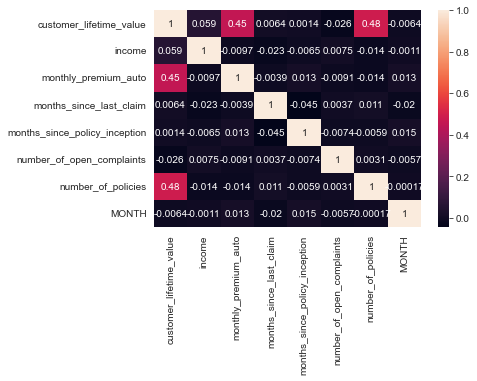

In [30]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)
plt.show()
# plt.savefig('name_i_want.png')

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

I didnt find any column with high correlation

# Start of LAB5

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [32]:
# X-y split.

In [33]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [34]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [35]:
X_num.isna().sum()

customer_lifetime_value            0
income                             0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
MONTH                              0
dtype: int64

In [36]:
  X_num[X_num['months_since_last_claim'].isna() & X_num['number_of_open_complaints'].isna()]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,MONTH
4,9025.067525,23675,117,NaN,31,NaN,7,1
23,5107.071054,70174,64,NaN,80,NaN,7,2
51,2590.096027,22398,67,NaN,76,NaN,1,1
59,5575.751228,91416,69,NaN,39,NaN,5,1
67,7507.455372,60920,64,NaN,61,NaN,2,2
...,...,...,...,...,...,...,...,...
10801,5384.671725,13103,72,NaN,32,NaN,7,2
10816,5531.723723,50097,71,NaN,81,NaN,5,1
10833,3981.775889,52801,100,NaN,78,NaN,1,2
10834,6770.306834,74422,85,NaN,3,NaN,3,2


In [37]:
  X_num=  X_num.dropna(subset=['months_since_last_claim', 'number_of_open_complaints'])

In [38]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10277 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10277 non-null  float64
 1   income                         10277 non-null  int64  
 2   monthly_premium_auto           10277 non-null  int64  
 3   months_since_last_claim        10277 non-null  float64
 4   months_since_policy_inception  10277 non-null  int64  
 5   number_of_open_complaints      10277 non-null  float64
 6   number_of_policies             10277 non-null  int64  
 7   MONTH                          10277 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 722.6 KB


## Normalizing data

In [39]:
import pickle

In [44]:
# Normalizing data
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

#saving objects in my computer
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)
#loading object from my computer  
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized#.shape

array([[9.96331516e-02, 9.95022824e-01, 1.26374466e-03, ...,
        0.00000000e+00, 1.86454130e-04, 4.14342511e-05],
       [9.99518804e-01, 0.00000000e+00, 2.87047247e-02, ...,
        0.00000000e+00, 4.48511324e-04, 4.48511324e-04],
       [5.59573341e-01, 8.28770586e-01, 3.74348700e-03, ...,
        0.00000000e+00, 7.48697400e-05, 7.48697400e-05],
       ...,
       [5.14349634e-01, 8.57568559e-01, 4.32691418e-03, ...,
        0.00000000e+00, 4.30538725e-05, 4.30538725e-05],
       [1.83332463e-01, 9.83047898e-01, 2.41952750e-03, ...,
        6.12538608e-05, 9.18807912e-05, 3.06269304e-05],
       [9.99881224e-01, 0.00000000e+00, 1.47266074e-02, ...,
        0.00000000e+00, 4.37423982e-04, 1.45807994e-04]])

In [45]:
# using standard scaler
transformer_Stand = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first (optional)
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer_Stand.fit(X_num)

x_standardized = transformer_Stand.transform(X_num)
x_standardized#.shape
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6,7
0,-0.464806,0.341731,-0.932825,-0.808451,0.140047,-0.421143,2.524068,1.071961
1,-0.837178,-1.239422,-0.845895,-1.205282,-0.790678,-0.421143,-0.822307,-0.932870
2,0.998127,-0.510588,0.197265,1.870158,-0.611693,-0.421143,-0.404010,1.071961
3,2.063653,0.376265,0.110335,-0.510828,-1.614011,-0.421143,-0.404010,-0.932870
4,-0.474045,0.424691,-0.932825,-1.304490,0.891786,-0.421143,1.687474,1.071961
...,...,...,...,...,...,...,...,...
10272,1.615775,-1.239422,2.718237,-0.113997,-0.575895,-0.421143,-0.404010,1.071961
10273,-0.399841,0.773553,-0.816919,-0.808451,0.712800,-0.421143,1.269177,-0.932870
10274,2.288874,0.072044,3.123911,-0.411620,0.533815,-0.421143,-0.404010,1.071961
10275,0.568723,0.873929,1.877913,-1.502905,-0.754881,3.962838,1.269177,1.071961


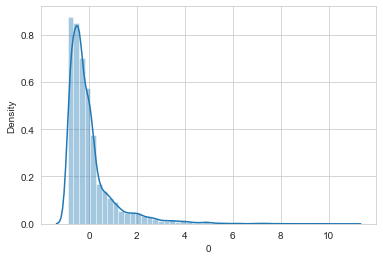

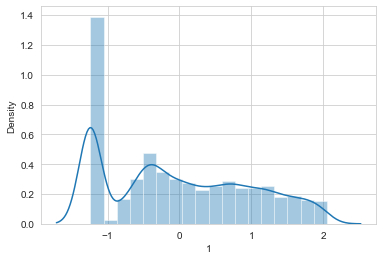

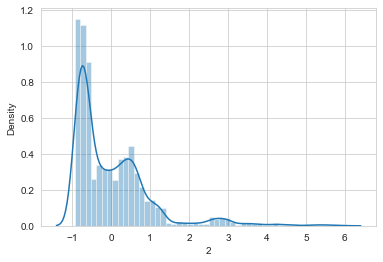

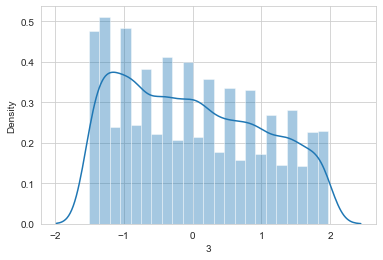

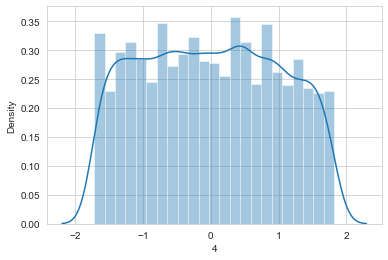

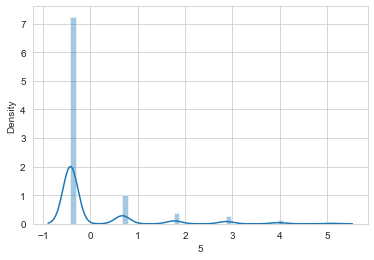

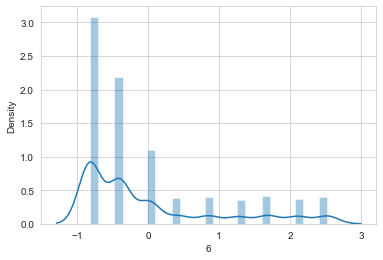

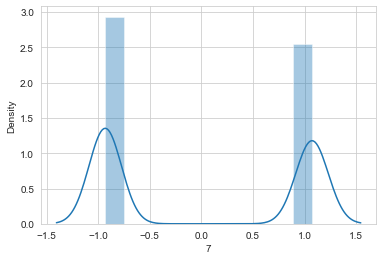